C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


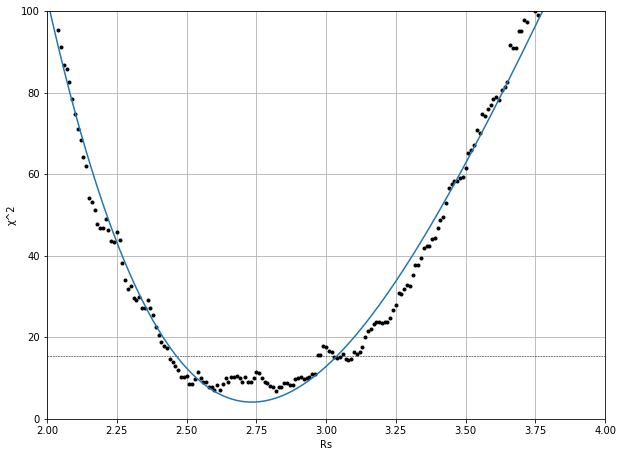

Harmonic mean for Rs = 2.7607993519087994
Sv_min: 1.3674582281904846
Sv_max: 1.5414541247144298
95CI_LowerLimit: 1.398247254512504
95CI_UpperLimit: 1.5035323964666039
1σ_LowerLimit: 1.4240313709094263
1σ_UpperLimit: 1.4777482800696815
■ Mean：1.450889825489554、Standard deviation：0.026858454580127533
  - 95% confidence interval of maternal mean CI = [1.450 , 1.452]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:246: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:248: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:256: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:257: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:267: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:268: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:277: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:278: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packag

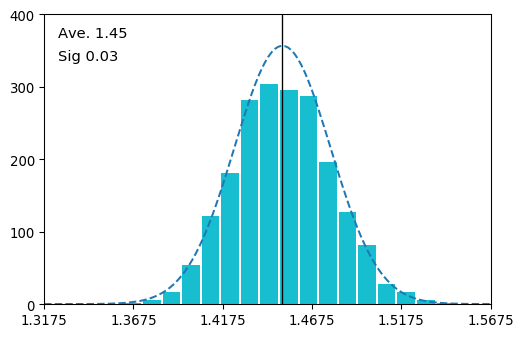

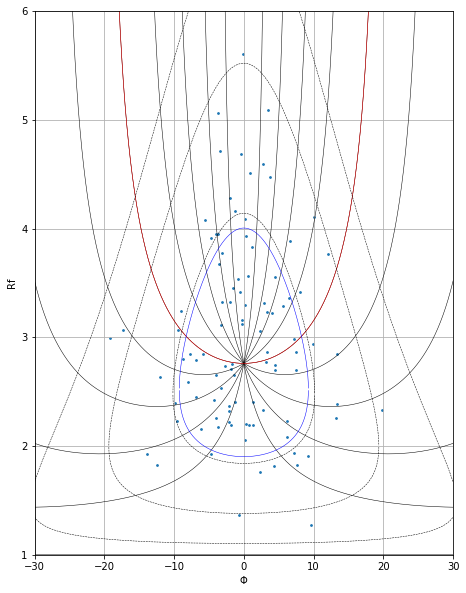

In [2]:
#Estimation of Rs (axial ratio of strain ellipsoid)

from IPython.display import display
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import math
import xlrd
import pandas as pd
import scipy.stats as st
import matplotlib.ticker as ticker 
import matplotlib.transforms as ts 

from sympy import pi
from pylab import*



#Enter the Rf/phi data file to be analyzed.
df = pd.read_excel("C:\\Users\\shoso\\OneDrive\DP3_xz_21.xlsx")

#Set the range of Rs you want to check (it is better to set a wide range at first).
Rs_min = 2.0
Rs_max = 4.0


phi_d = df['phi'].values
rf_d = df['Rf'].values

n = len(phi_d)

#Set the size of the graph.
plt.figure(figsize=(10,7.5))


rs_min = round(Rs_min*100)
rs_max = round(Rs_max*100)

Rs_array = []
kai_array = []

for rs in range(rs_min,rs_max,1):

    Rs = rs/100
    theta_rng = range(0,90,9)
    ary = [0]*(len(theta_rng))
    ary2 = [0]*(len(theta_rng))
    
    for col,col2 in zip(phi_d,rf_d):
        p_rad = np.radians(col)
        
        for index,theta in enumerate(theta_rng):
            t_rad = np.radians(theta)
            t_rad2 = np.radians(theta+9)
            cur = (((math.tan(2*t_rad))*(Rs**2-(np.tan(p_rad))**2)-2*Rs*np.tan(p_rad))/((math.tan(2*t_rad))*(1-(Rs*np.tan(p_rad))**2)-2*Rs*np.tan(p_rad)))**(1/2)
            cur2 = (((math.tan(2*t_rad2))*(Rs**2-(np.tan(p_rad))**2)-2*Rs*np.tan(p_rad))/((math.tan(2*t_rad2))*(1-(Rs*np.tan(p_rad))**2)-2*Rs*np.tan(p_rad)))**(1/2)
            
            if 0  < col:
                if cur2 <= col2 and not cur <= col2:
                    ary[index] += 1
                    break
            else:
                if cur <= col2 and not cur2 < col2:
                    ary2[index] += 1
                    break



    p_0_9 = ary[9]+ary2[0]
    p_9_18 = ary[8]+ary2[1]
    p_18_27 = ary[7]+ary2[2]
    p_27_36 = ary[6]+ary2[3]
    p_36_45 = ary[5]+ary2[4]
    p_45_54 = ary[4]+ary2[5]
    p_54_63 = ary[3]+ary2[6]
    p_63_72 = ary[2]+ary2[7]
    p_72_81 = ary[1]+ary2[8]
    p_81_90 = n - (p_0_9+p_9_18+p_18_27+p_27_36+p_36_45+p_45_54+p_54_63+p_63_72+p_72_81)

    E = n/(len(theta_rng))

    kai_sq = ((p_0_9-E)**2+(p_9_18-E)**2+(p_18_27-E)**2+(p_27_36-E)**2+(p_36_45-E)**2+(p_45_54-E)**2+(p_54_63-E)**2+(p_63_72-E)**2+(p_72_81-E)**2+(p_81_90-E)**2)/E
    
    
    plt.plot(Rs,kai_sq,marker = '.',color = 'black')

    Rs_array.append(Rs)
    kai_array.append(kai_sq)

Rs_ar = np.array(Rs_array)
kai_ar = np.array(kai_array)

plt.plot(Rs_ar,np.poly1d(np.polyfit(Rs_ar,kai_ar,4))(Rs_ar),label='d=2')

    
#Line showing degrees of freedom v = 8, significance level α = 0.05.
plt.hlines([15.507],Rs_min,Rs_max,linestyles='dashed',lw=0.5)


plt.grid()
plt.xlabel('Rs')
plt.ylabel('χ^2')



#Range to display.
ax=plt.subplot()
ax.set_xlim([Rs_min,Rs_max])
ax.set_ylim([0,100])


plt.show()


#Harmonic Mean
Rr = (1/(rf_d)).sum()
H = n/Rr
print('Harmonic mean for Rs =',H)



#Estimation of mean Ri ( mean aspect ratio of particles before deformation).

#Calculate Ri corresponding to each plot (use Harmonic mean or input a specific value as Rs).
Rs=H

#When using this program alone, remove the following three #'s
#df = pd.read_excel("C:\\Users\\shoso\\OneDrive\DP3_xz_21.xlsx")
#phi_d = df['phi'].values
#rf_d = df['Rf'].values

phi_rad=np.radians(phi_d)

eachRi_array=[]


for col,col2 in zip(phi_rad,rf_d):

    a=(1/2)*((col2+1/col2)*(Rs+1/Rs)-(col2-1/col2)*(Rs-1/Rs)*math.cos(2*col))
    
    Ri=(a+(a**2-4)**(1/2))/2
    
    eachRi_array.append(Ri)
    


#Bootstrap method
j = 100                    # Y-axis (frequency) tick width
k = 0.012                   # Interval width
bi=25

Ri_array=[]

df = pd.DataFrame(eachRi_array)


for i in range(2000):
    deff_array=[]

#Data resampling, where n is the number of rows in the original data (recovery extraction).
    df_re=df.sample(n=len(df), replace=True)   
        
    v_d = df_re.values
    mean = sum(v_d)/len(v_d)
    Ri_array.append(mean)
       
print('Sv_min:',min(Ri_array))
print('Sv_max:',max(Ri_array))

plt.figure(dpi=96)
plt.xlim(min(Ri_array),max(Ri_array))
d = 0.001

nu   = len(Ri_array)          
mu  = sum(Ri_array)/nu       

Ri_nar=np.array(Ri_array)
sig = Ri_nar.std(ddof=0)  

Ci_u=mu+1.96*sig
Ci_l=mu-1.96*sig
Cs_u=mu+sig
Cs_l=mu-sig

print('95CI_LowerLimit:',Ci_l)
print('95CI_UpperLimit:',Ci_u)
print('1σ_LowerLimit:',Cs_l)
print('1σ_UpperLimit:',Cs_u)

print(f'■ Mean：{mu}、Standard deviation：{sig}')

ci1, ci2 = (None, None)

U2 = Ri_nar.var(ddof=1)  
DF = nu-1                     
SE = math.sqrt(U2/nu)         
ci1,ci2 = st.t.interval( alpha=0.95, loc=mu, scale=SE, df=DF )
print(f'  - 95% confidence interval of maternal mean CI = [{ci1:.3f} , {ci2:.3f}]')


#Histgram
hist_data = plt.hist(Ri_array, bins=bi, color='tab:cyan', range=(min(Ri_array)-0.05, max(Ri_array)+0.05), rwidth=0.9)
plt.gca().set_xticks(np.arange(min(Ri_array),max(Ri_array)-k+d, k))

#An approximate curve assuming a normal distribution.
sig = Ri_nar.std(ddof=1)  
nx = np.linspace(min(Ri_array)-0.05, max(Ri_array)+d+0.05, 150) 
ny = st.norm.pdf(nx,mu,sig) * k * len(Ri_array)
plt.plot( nx , ny, color='tab:blue', linewidth=1.5, linestyle='--')


plt.gca().set_xticks(np.arange(min(Ri_array)-0.05,max(Ri_array)+d+0.05, 0.05))

y_max = max(hist_data[0].max(), st.norm.pdf(mu,mu,sig) * k * len(Ri_array))
y_max = int(((y_max//j)+1)*j) 
plt.ylim(0,y_max)
plt.gca().set_yticks( range(0,y_max+1,j) )



tx = 0.03 # For adjusting text output position.
ty = 0.91 # For adjusting text output position.
tt = 0.08 # For adjusting text output position.
tp = dict( horizontalalignment='left',verticalalignment='bottom',
           transform=plt.gca().transAxes, fontsize=11 )
plt.text( tx, ty, f'Ave. {mu:.2f}', **tp)
plt.text( tx, ty-tt, f'Sig {sig:.2f}', **tp)
plt.vlines( mu, 0, y_max, color='black', linewidth=1 )


#Rf/phi plot
Rs = H
Ri = mu
phi = np.linspace(-40,40,100000)
p_rad = np.radians(phi)

#Set the size of the graph.
plt.figure(figsize=(7.5,10))


#Theta-Curve
for theta in range(0,90,9):
    t_rad = math.radians(theta)
    plt.plot(phi,(((math.tan(2*t_rad))*(Rs**2-(np.tan(p_rad))**2)-2*Rs*np.tan(p_rad))/((math.tan(2*t_rad))*(1-(Rs*np.tan(p_rad))**2)-2*Rs*np.tan(p_rad)))**(1/2),lw=0.5,c='#000000')

plt.plot(phi,(((math.tan(pi/2))*(Rs**2-(np.tan(p_rad))**2)-2*Rs*np.tan(p_rad))/((math.tan(pi/2))*(1-(Rs*np.tan(p_rad))**2)-2*Rs*np.tan(p_rad)))**(1/2),lw=0.5,c='red')


#Ri-Curve
I = Ri + 1/Ri
a = (Rs - 1/Rs)*np.cos(2*p_rad) - (Rs + 1/Rs)
b = (Rs - 1/Rs)*np.cos(2*p_rad) + (Rs + 1/Rs)

Rf1 = -I/a - (I**2 + a*b)**(1/2)/a
Rf2 = -I/a + (I**2 + a*b)**(1/2)/a

plt.plot(phi,Rf1,lw=0.5,c='blue')
plt.plot(phi,Rf2,lw=0.5,c='blue')

#Ri = 1.5,2.0,2.5(Dotted line, from inside.)
Ri_1 = 1.5
I_1 = Ri_1 + 1/Ri_1
a_1 = (Rs - 1/Rs)*np.cos(2*p_rad) - (Rs + 1/Rs)
b_1 = (Rs - 1/Rs)*np.cos(2*p_rad) + (Rs + 1/Rs)
Rf1_1 = -I_1/a_1 - (I_1**2 + a_1*b_1)**(1/2)/a_1
Rf2_1 = -I_1/a_1 + (I_1**2 + a_1*b_1)**(1/2)/a_1
    
plt.plot(phi,Rf1_1,linestyle = "--",lw=0.5,c='black')
plt.plot(phi,Rf2_1,linestyle = "--",lw=0.5,c='black')

Ri_2 = 2.0
I_2 = Ri_2 + 1/Ri_2
a_2 = (Rs - 1/Rs)*np.cos(2*p_rad) - (Rs + 1/Rs)
b_2 = (Rs - 1/Rs)*np.cos(2*p_rad) + (Rs + 1/Rs)
Rf1_2 = -I_2/a_2 - (I_2**2 + a_2*b_2)**(1/2)/a_2
Rf2_2 = -I_2/a_2 + (I_2**2 + a_2*b_2)**(1/2)/a_2
    
plt.plot(phi,Rf1_2,linestyle = "--",lw=0.5,c='black')
plt.plot(phi,Rf2_2,linestyle = "--",lw=0.5,c='black')

Ri_3 = 2.5
I_3 = Ri_3 + 1/Ri_3
a_3 = (Rs - 1/Rs)*np.cos(2*p_rad) - (Rs + 1/Rs)
b_3 = (Rs - 1/Rs)*np.cos(2*p_rad) + (Rs + 1/Rs)
Rf1_3 = -I_3/a_3 - (I_3**2 + a_3*b_3)**(1/2)/a_3
Rf2_3 = -I_3/a_3 + (I_3**2 + a_3*b_3)**(1/2)/a_3
    
plt.plot(phi,Rf1_3,linestyle = "--",lw=0.5,c='black')
plt.plot(phi,Rf2_3,linestyle = "--",lw=0.5,c='black')

    
plt.scatter(phi_d,rf_d,s=3)
    
plt.grid()
plt.xlabel('Φ')
plt.ylabel('Rf')



#Range to display.
ax=plt.subplot()
ax.set_xlim([-30,30])
ax.set_ylim([1,6])

plt.show()